In [319]:
import matplotlib.pyplot as plt
import math
import numpy as np
from boltons import iterutils

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

In [320]:
A=(4, 5)
B=(-2, -4)
C=(8, -1)

#### 1.1. Plot them using `matplotlib`  

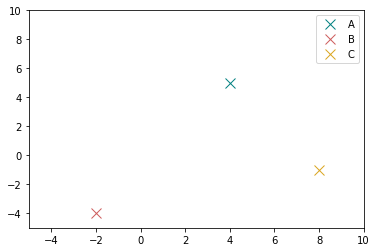

In [321]:
fig, ax = plt.subplots()

plt.plot(A[0], A[1], "x", markersize=10, label="A", color="teal")
plt.plot(B[0], B[1], "x", markersize=10, label="B", color="indianred")
plt.plot(C[0], C[1], "x", markersize=10, label="C", color="goldenrod")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [322]:
def distance(point_1, point_2):
    d1 = point_1[0] - point_2[0]
    d2 = point_1[1] - point_2[1]
    return math.sqrt(d1 ** 2 + d2 ** 2)

In [323]:
print(f" The distance AC is {round(distance(A,C),2)}")
print(f" The distance AB is {round(distance(A,B),2)}")
print(f" The distance BC is {round(distance(B,C),2)}")


 The distance AC is 7.21
 The distance AB is 10.82
 The distance BC is 10.44


The longer distance is AB

#### 1.3. What is the perimeter of triangle $ABC$?

In [324]:
perimeter = round(distance(A,C) + distance(C,B) + distance(B,A),2)
perimeter

28.47

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [325]:
def initialize_grid(limit1,limit2,limit3,limit4):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # where do we want lines
    ticks = np.arange(limit1, limit2, 2)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([limit1, limit2])
    ax.set_ylim([limit3, limit4])

In [326]:
x = np.linspace(
    start=-20, 
    stop=20, 
    num=300
)

In [327]:
y1 = 2 * x - 3
y2 = -3 * x + 12

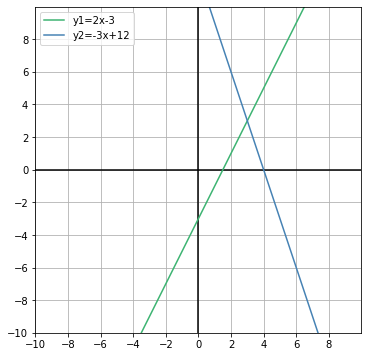

In [328]:
initialize_grid(-10,10,-10,10)
plt.plot(x, y1, "-", markersize=10, color = "mediumseagreen",  label='y1=2x-3')
plt.plot(x, y2, "-", markersize=10, color = "steelblue", label='y2=-3x+12')
plt.legend()

#### 2.2. What are the respective slopes

In [331]:
def slope(y,x):
    return round((y[2]-y[0]) / (x[2]-x[0]),2)

print(f"The slope of y1 is: {slope(y1,x)}")
print(f"The slope of y2 is: {slope(y2,x)}")

The slope of y1 is: 2.0
The slope of y2 is: -3.0


#### 2.3. Give 3 points through which $y_1$ goes through

In [332]:
def x_to_y(x):
    return 2 * x - 3

print(f"(0,{x_to_y(0)}) (4,{x_to_y(4)}) (100,{x_to_y(100)})")

(0,-3) (4,5) (100,197)


#### 2.4. Where do they intersect?

$$ax + b = cx + d$$

$$ax - cx = d - b$$

$$x(a-c) = (d-b)$$

$$x=\frac{d-b}{a-c}$$



In [333]:
a = 2
b = -3
c = -3
d = 12

In [334]:
print(f"They intersect at {(d-b)/(a-c)},{x_to_y((d-b)/(a-c))}")

They intersect at 3.0,3.0


#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

In [335]:
slope = (33400-10000) / (39-21)
slope

1300.0

$$y = 1300x + intercept$$

$$33400 = 1300*39 + intercept$$
$$10000 = 1300*21 + intercep$$

In [336]:
intercept1 = 33400 - 1300*39
intercept2 = 10000 - 1300*21
intercept1 == intercept2

True

$$y = 1300x - 17300$$

In [337]:
print(f"At 50 he will earn {1300*50-17300}$/year")

At 50 he will earn 47700$/year


### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

In [338]:
y2 = x**2 - 3*x - 10
y3 = x**3 - 2*(x**2) + 5*x + 1
y4 = x**4 - x**3 + x**2 - x + 1

#### 3.1. Plot them

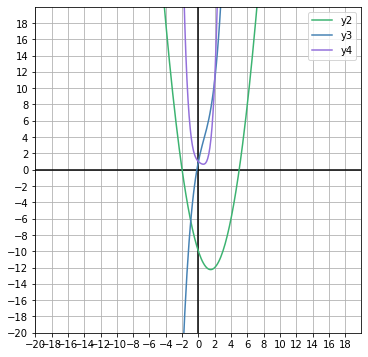

In [339]:
initialize_grid(-20,20,-20,20)
plt.plot(x, y2, "-", markersize=10, color = "mediumseagreen",  label='y2')
plt.plot(x, y3, "-", markersize=10, color = "steelblue", label='y3')
plt.plot(x, y4, "-", markersize=10, color = "mediumpurple", label='y4')
plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [349]:
def x_to_y(x):
    y2 = x**2 - 3*x - 10
    y3 = x**3 - 2*(x**2) + 5*x + 1
    y4 = x**4 - x**3 + x**2 - x + 1
    
    if max(y2,y3,y4) == y2:
        max_ = 'y2'
    elif max(y2,y3,y4) == y3:
        max_ = 'y3'
    else:
        max_ = 'y4'
        
    return print(f"y2 = {y2}, y3 = {y3}, y4 = {y4} \nThe bigger value is {max_}\n")

print("x=0: ")
x_to_y(0)
print("x=2: ")
x_to_y(2)
print("x=100: ")
x_to_y(100)

x=0: 
y2 = -10, y3 = 1, y4 = 1 
The bigger value is y3

x=2: 
y2 = -12, y3 = 11, y4 = 11 
The bigger value is y3

x=100: 
y2 = 9690, y3 = 980501, y4 = 99009901 
The bigger value is y4



#### 3.3. Who is the vertex of parabola $y_2$?

$$y = ax 2 + bx + c$$

$$Xv = \frac {-b}{2a}$$

In [350]:
a = 1
b = -3
c = -10

xv = -b / 2*a
print(f"The vertex is ({xv},{xv**2 - 3*xv - 10})")

The vertex is (1.5,-12.25)


#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

Intersection with X axis (y=0): $$x^2 - 3x - 10 = 0$$


In [351]:
x1 = (-b + math.sqrt(b**2 - 4*a*c))/2*a
x2 = (-b - math.sqrt(b**2 - 4*a*c))/2*a
print(f"y2 intersect X axis in {x1} and {x2}")

y2 intersect X axis in 5.0 and -2.0


Intersection with Y axis (x=0): $$ y = 0^2 - 3·0 - 10 = 0$$

In [353]:
print(f"y2 intersect Y axis in -10.0")

y2 intersect Y axis in -10.0


#### 3.5. As x gets very big, what happens to $y$ go in each case?

As x grows, y tends to infinite(+) in all cases. 

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

As x decreases, y tends to infinite(+) in y2 and y4, and to infinite(-) in y3.

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [354]:
print(f"{round(math.e,3)}")

2.718


#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [355]:
math.e ** 0

1.0

In [356]:
round(math.e ** 1,3)

2.718

In [357]:
round(math.e ** 2,3)

7.389

In [358]:
round(math.e ** 3,3)

20.086

In [359]:
round(math.e ** 10,3)

22026.466

#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [360]:
round(math.e ** -1,3)

0.368

In [361]:
round(math.e ** -2,3)

0.135

In [362]:
round(math.e ** -3,3)

0.05

In [363]:
round(math.e ** -10,3)

0.0

#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

In [364]:
y1 = math.e ** x
y2 = math.e ** (2*x)
y3 = math.e ** (-x)

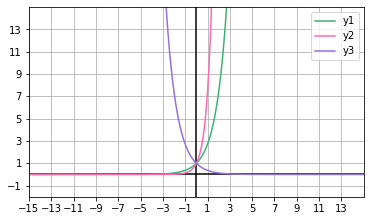

In [365]:
initialize_grid(-15,15,-2,15)
plt.plot(x, y1, "-", markersize=10, color = "mediumseagreen",  label='y1')
plt.plot(x, y2, "-", markersize=10, color = "hotpink", label='y2')
plt.plot(x, y3, "-", markersize=10, color = "mediumpurple", label='y3')
plt.legend()

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [366]:
sum(range(4,8))

22

$$\sum_{n=-2}^3 (n + 1)$$

In [367]:
serie = []
for i in range(-2,4):
    serie.append(i+1)
sum(serie)

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [368]:
serie = []
for i in range(-2,4):
    serie.append((i**2)-2)
sum(serie)

7

$$\sum_{n=0}^4 (10^n - 1)$$

In [369]:
serie = []
for i in range(0,5):
    serie.append((10 ** i)-1)
sum(serie)

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

$$\frac{10!}{2!·8!}=\frac{10·9·8!}{8!·2!}$$

In [370]:
print(f"There are {int((10*9)/2)} handshakes")

There are 45 handshakes


#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

$$\frac{11!}{8!} = \frac{11·10·9·8!}{8!}$$

In [371]:
print(f"There are {int((11*10*9))} possible combinations")

There are 990 possible combinations


### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000

In [372]:
def is_prime(n):
    for number in range(2,math.ceil(n ** 0.5) + 1):
        if n % number == 0:
            return(False)
    return(True)

In [373]:
prime = []
for num in range(1001):
    if is_prime(num):
        prime.append(num)

In [374]:
twins = []
for i in range((len(prime) -1)):
    if prime[i+1]-prime[i] == 2:
            twins.append(prime[i])
            twins.append(prime[i+1])
print(f"There are {len(twins)/2} twin prime numbers below 1000")

iterutils.chunked(twins, 2)

There are 36.0 twin prime numbers below 1000


[[1, 3],
 [3, 5],
 [5, 7],
 [11, 13],
 [17, 19],
 [29, 31],
 [41, 43],
 [59, 61],
 [71, 73],
 [101, 103],
 [107, 109],
 [137, 139],
 [149, 151],
 [179, 181],
 [191, 193],
 [197, 199],
 [227, 229],
 [239, 241],
 [269, 271],
 [281, 283],
 [311, 313],
 [347, 349],
 [419, 421],
 [431, 433],
 [461, 463],
 [521, 523],
 [569, 571],
 [599, 601],
 [617, 619],
 [641, 643],
 [659, 661],
 [809, 811],
 [821, 823],
 [827, 829],
 [857, 859],
 [881, 883]]